In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [69]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44,target
0,FR13,2019-12-30,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0,7663.0
1,FR13,2020-01-06,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0,2917.0
2,FR13,2020-01-13,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0,2341.0
3,FR13,2020-01-20,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0,3853.0
4,FR13,2020-01-27,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0,82251.0


In [70]:
# Move 'target' column to the 4 position
cols = list(df.columns)
cols = cols[:2] + cols[-1:] + cols[2:-1]
df = df[cols]

# Show the first 5 rows
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [71]:
# Print the shape of the dataframe
print(df.shape)


(868, 13)


In [72]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']

In [73]:
# Mean, median, variance and standard deviation of the target variable for IT01
print("Mean: " + str(df_IT['target'].mean()))
print("Median: " + str(df_IT['target'].median()))
print("Variance: " + str(df_IT['target'].var()))
print("Standard Deviation: " + str(df_IT['target'].std()))


# Print max and min of the target variable for IT01
print("Max value: " + str(df_IT['target'].max()))
print("Min value: " + str(df_IT['target'].min()))


Mean: 2284.8720930232557
Median: 1539.0
Variance: 4801058.240854075
Standard Deviation: 2191.1317260388696
Max value: 13805.0
Min value: 22.0


In [74]:
# Print all rows where the target variable is equal greater than 3000
print(df_IT[df_IT['target'] > 10000])

    item_id   timestamp   target  ACT01  ACT03  ACT04  ACT07  ACT09  ACT13  \
402    IT01  2021-01-18  10447.0  174.0   19.0    0.0  322.0   36.0  163.0   
442    IT01  2021-10-25  13805.0  874.0   62.0    0.0  360.0  145.0   30.0   
453    IT01  2022-01-17  10336.0  166.0    0.0    0.0  363.0    0.0    1.0   
466    IT01  2022-04-18  11251.0  201.0   31.0    0.0  140.0   24.0   76.0   
506    IT01  2023-01-23  12863.0  328.0   42.0    0.0  472.0   33.0   81.0   

       ACT15   ACT17  ACT32    ACT44  
402      1.0     0.0  222.0   9510.0  
442   6039.0  6024.0  271.0      0.0  
453      0.0     0.0  323.0   9483.0  
466  10446.0     0.0  333.0      0.0  
506      0.0     0.0  970.0  10937.0  


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


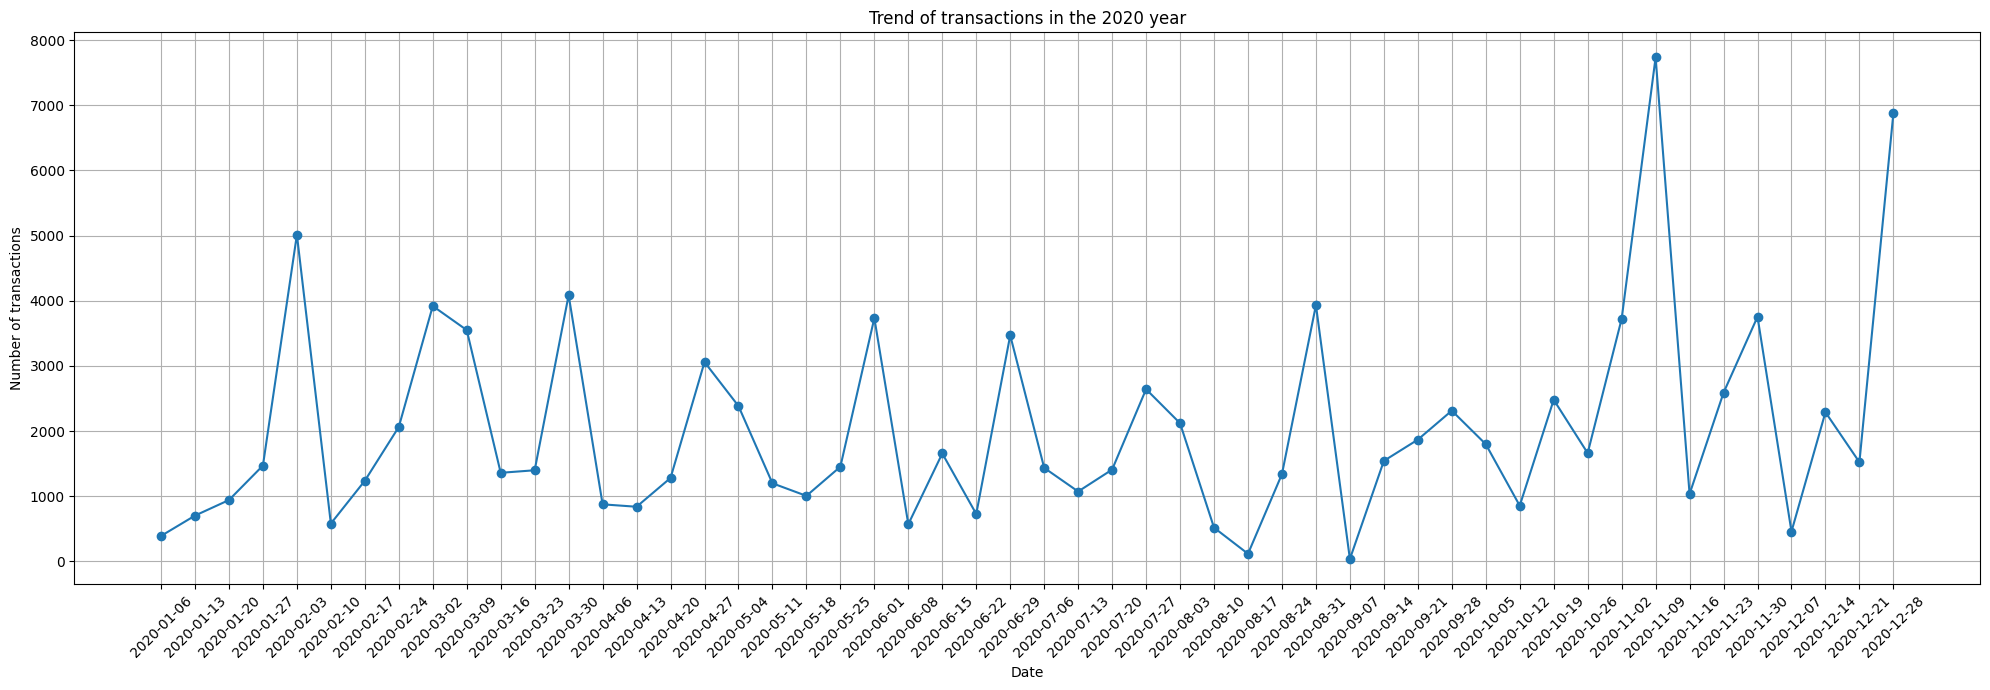

In [75]:
# Show the trend of the target variable for IT01 where year of timestamp is 2020
df_IT_2020 = df_IT[df_IT['timestamp'].str.contains('2020')]


# Plot
plt.figure(figsize=(20, 7)) 
plt.plot(df_IT_2020['timestamp'], df_IT_2020['target'], marker='o', linestyle='-') 
plt.title('Trend of transactions in the 2020 year') 
plt.xlabel('Date')  
plt.ylabel('Number of transactions')  
plt.xticks(rotation=45)  
plt.grid(True) 
plt.tight_layout()  
plt.show()



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


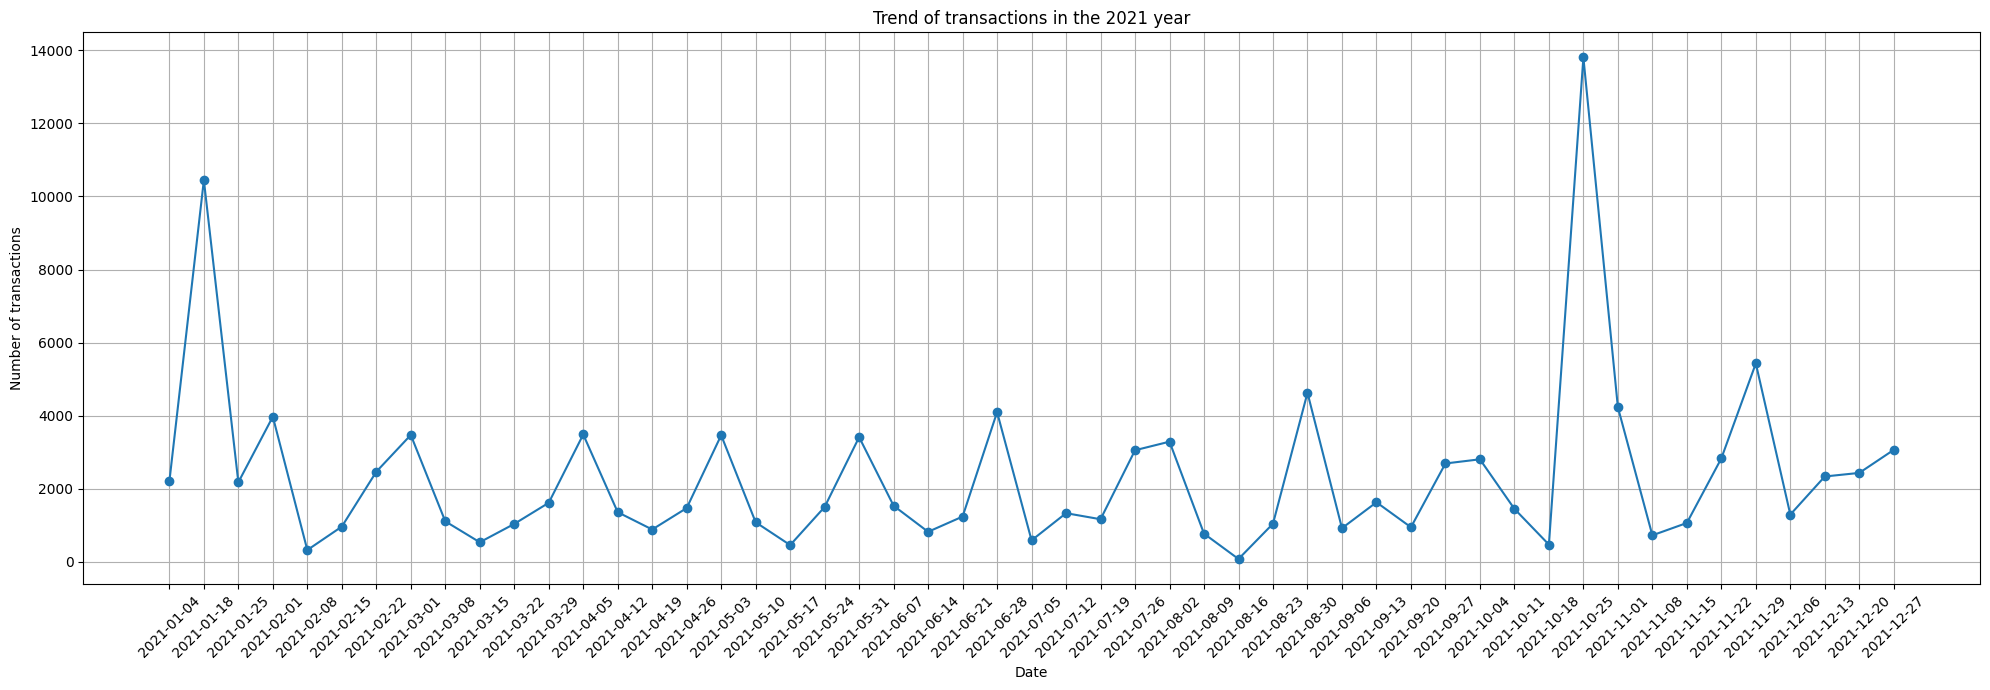

In [76]:
# Show the trend of the target variable for IT01 where year of timestamp is 2021
df_IT_2021 = df_IT[df_IT['timestamp'].str.contains('2021')]


# Plot
plt.figure(figsize=(20, 7)) 
plt.plot(df_IT_2021['timestamp'], df_IT_2021['target'], marker='o', linestyle='-') 
plt.title('Trend of transactions in the 2021 year') 
plt.xlabel('Date')  
plt.ylabel('Number of transactions')  
plt.xticks(rotation=45)  
plt.grid(True) 
plt.tight_layout()  
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


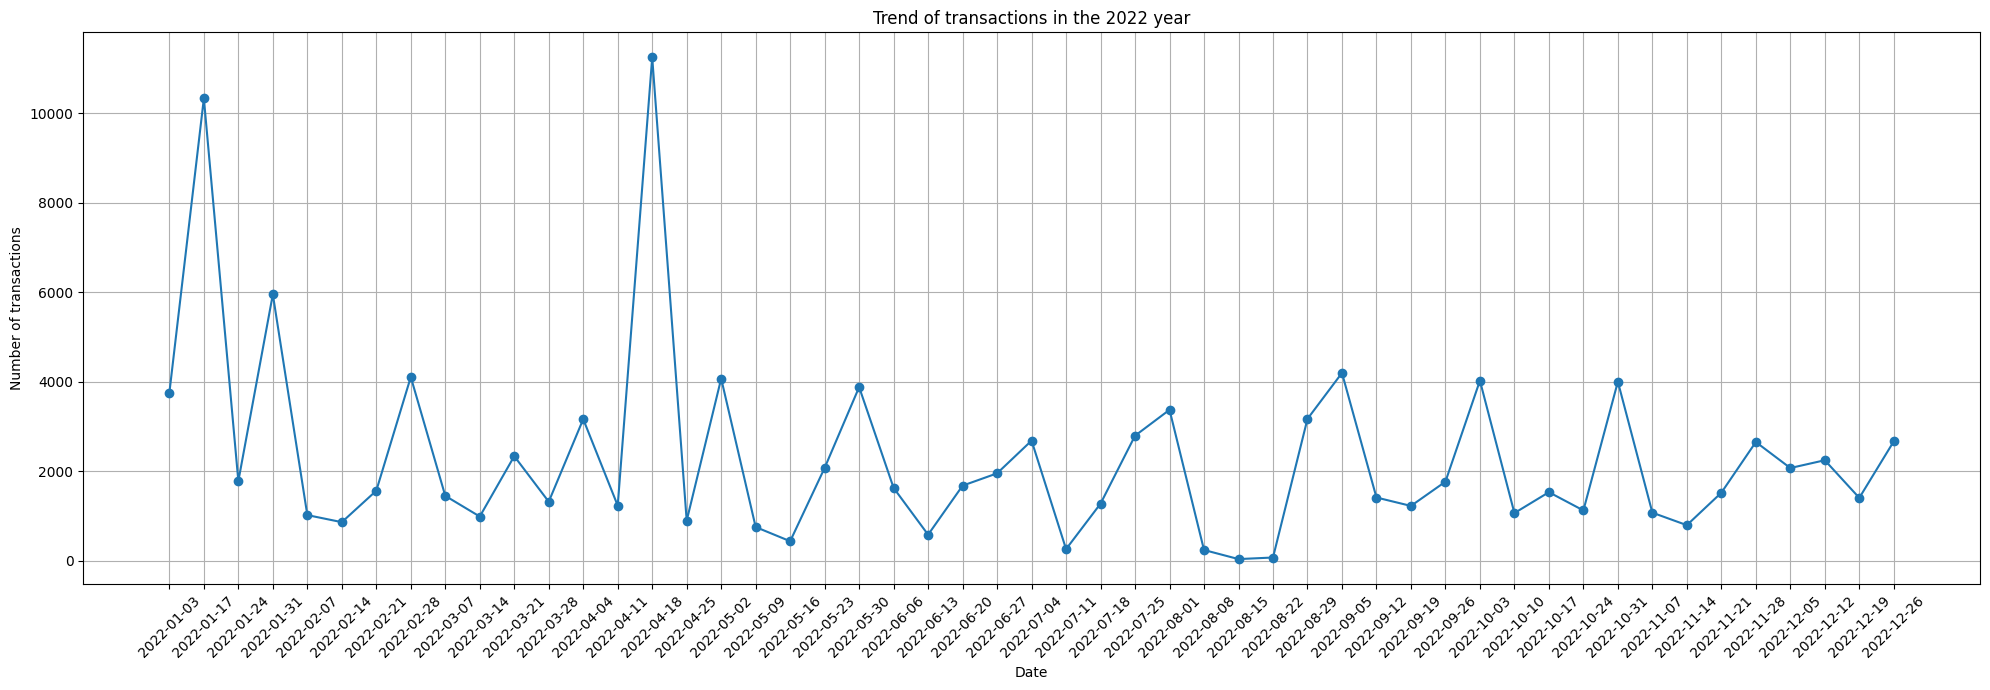

In [77]:
# Show the trend of the target variable for IT01 where year of timestamp is 2022
df_IT_2022 = df_IT[df_IT['timestamp'].str.contains('2022')]


# Plot
plt.figure(figsize=(20, 7)) 
plt.plot(df_IT_2022['timestamp'], df_IT_2022['target'], marker='o', linestyle='-') 
plt.title('Trend of transactions in the 2022 year') 
plt.xlabel('Date')  
plt.ylabel('Number of transactions')  
plt.xticks(rotation=45)  
plt.grid(True) 
plt.tight_layout()  
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


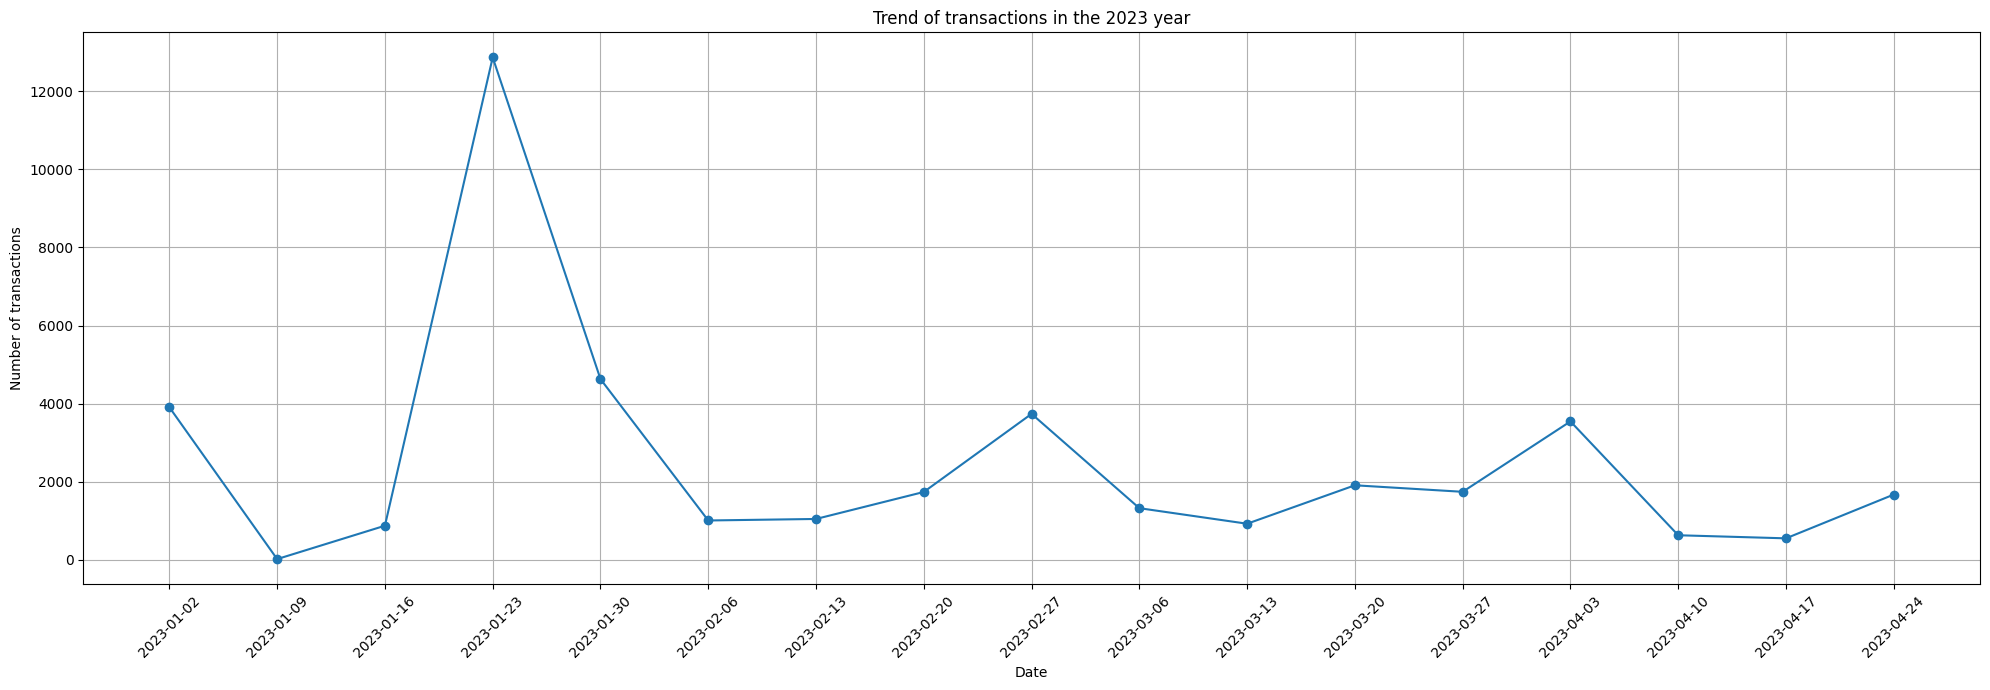

In [78]:
# Filtra i dati relativi al 2023
df_IT_2023 = df_IT[df_IT['timestamp'].str.contains('2023')]

# Plot
plt.figure(figsize=(20, 7)) 
plt.plot(df_IT_2023['timestamp'], df_IT_2023['target'], marker='o', linestyle='-') 
plt.title('Trend of transactions in the 2023 year') 
plt.xlabel('Date')  
plt.ylabel('Number of transactions')  
plt.xticks(rotation=45)  
plt.grid(True) 
plt.tight_layout()  
plt.show()


In [79]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6976744186046512
0.3023255813953488


In [80]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target   ACT01  ACT03  ACT04  ACT07  ACT09  ACT13   ACT15  \
item_id timestamp                                                               
IT01    2019-12-30  7613.0  1228.0   87.0    0.0  195.0  188.0   32.0  1817.0   
        2020-01-06   390.0    87.0   63.0    0.0    5.0    8.0    0.0     0.0   
        2020-01-13   702.0   161.0   10.0    0.0   14.0    0.0   49.0     1.0   
        2020-01-20   941.0   437.0  143.0    0.0   86.0   67.0  110.0     0.0   
        2020-01-27  1470.0   403.0  457.0    0.0  178.0  108.0   48.0     7.0   

                     ACT17   ACT32  ACT44  
item_id timestamp                          
IT01    2019-12-30  1255.0  2811.0    0.0  
        2020-01-06     0.0   227.0    0.0  
        2020-01-13     0.0   467.0    0.0  
        2020-01-20     0.0    98.0    0.0  
        2020-01-27     0.0   269.0    0.0

In [81]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target  ACT01  ACT03  ACT04  ACT07  ACT09  ACT13  ACT15  \
item_id timestamp                                                             
IT01    2022-05-02  4074.0  788.0   29.0    0.0  396.0   30.0  111.0  515.0   
        2022-05-09   756.0  137.0    0.0    0.0  124.0    0.0    0.0    0.0   
        2022-05-16   439.0  153.0   27.0    0.0   76.0    2.0   24.0    0.0   
        2022-05-23  2078.0  452.0   28.0    0.0  387.0   57.0  158.0  506.0   
        2022-05-30  3883.0  912.0  198.0    0.0  514.0  178.0  261.0   14.0   

                    ACT17   ACT32  ACT44  
item_id timestamp                         
IT01    2022-05-02  145.0  2060.0    0.0  
        2022-05-09    0.0   495.0    0.0  
        2022-05-16    0.0   157.0    0.0  
        2022-05-23  138.0   352.0    0.0  
        2022-05-30   10.0  1796.0    0.0

In [82]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=12,
    freq='W-MON',
    target='target',
    path='weekly_predictor',
    eval_metric='MASE'
)

In [83]:
# Fit the model
predictor.fit(
    train_data,
    presets='best_quality',
    num_val_windows=5,
    time_limit=2400,
    random_seed=42
)

Beginning AutoGluon training... Time limit = 2400s
AutoGluon will save models to 'weekly_predictor'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       6.87 GB / 15.78 GB (43.5%)
Disk Space Avail:   105.53 GB / 475.83 GB (22.2%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'W-MON',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 5,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 42,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 2400,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'W-MON'.
train_data contains missing values represented by NaN. They hav

In [84]:
# Make prediction on training data
predictions = predictor.predict(train_data)
predictions.head()

data with frequency 'None' has been resampled to frequency 'W-MON'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
IT01    2022-05-02  4574.191895  3452.977539  3567.475098  4027.618408   
        2022-05-09  1313.863647   531.477905  1011.096497  1202.044800   
        2022-05-16   945.418762   149.970139   593.156250   717.791565   
        2022-05-23  1202.445801   621.903015  1003.448181  1026.328613   
        2022-05-30  3623.275391  2727.274170  2926.253418  3162.873535   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
IT01    2022-05-02  4390.746582  4574.191895  4492.978027  4863.294922   
        2022-05-09  1239.941528  1313.863647  1356.608154  1475.031982   
        2022-05-16   804.043884   945.418762  1099.279785  1232.146484   
        2022-05-23  1154.482544  1202.445801  1197.594482  1273.981079   
        2022-05-30  3448.818604  3623.275391  3506.741699  3776.715332   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-05-02  4964.065430  5373.928711  
        2022-05-09  1684.295166  2012.690796  
        2022-05-16  1342.879150  1711.449097  
        2022-05-23  1414.946533  1618.803711  
        2022-05-30  3773.066406  3813.941895

In [85]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,NPTS,-0.291218,-0.872810,4.163424,0.038300,0.247416,3
1,DirectTabular,-0.379798,-0.819791,0.153631,0.133528,5.252631,8
2,PatchTST,-0.390760,-0.853419,0.117718,0.029660,274.596578,11
3,DeepAR,-0.444670,-0.945398,0.180793,0.109786,430.833620,9
4,WeightedEnsemble,-0.537652,-0.568749,18.201284,0.050815,13.494215,12
5,TemporalFusionTransformer,-0.544469,-0.568932,0.160440,0.029124,552.889732,10
6,CrostonSBA,-0.836662,-0.905811,18.037336,0.021691,35.869674,2
7,DynamicOptimizedTheta,-0.843813,-0.913061,42.235638,0.241461,50.108401,5
8,AutoETS,-1.245019,-1.040939,35.570082,0.020813,77.332164,4
9,AutoARIMA,-1.490722,-1.239598,24.156501,0.252419,72.727335,6


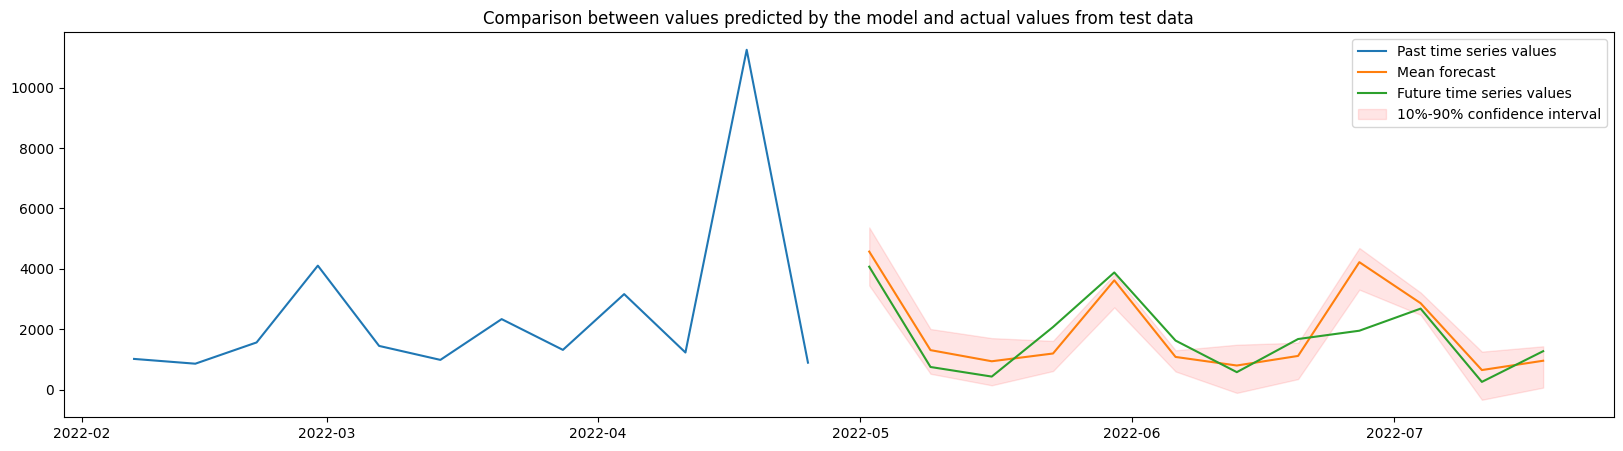

In [88]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data")

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

plt.plot(y_past[-12:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()